#Twitter Sentiment Analysis

In [1]:
!pip install tweepy
!pip install textblob

In [28]:
import tweepy  #to gather twtter data
from textblob import TextBlob #To find sentiment
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import re
plt.style.use('fivethirtyeight')

In [9]:
#Twiiiter API Credentials
APIKey = "vBxoxoCcUg7hP40Lhb54c2jxb"
APISecrectKey = "oIdExysUFEIKxpObOnE8Q25no86hKJ1RZsHxLlLPYXZXPDDuYc"
accessToken = "868330129096704000-OD7aa5kZCvIQoQEJ6kFrhKtnv3Fak2T"
accessTokenSecreat = "uuff2evRNlz4e9o8E2ckrrAK144lWBNPkQb9K3q4dsIRe"

In [10]:
#Create the authentication object
authenticate = tweepy.OAuthHandler(APIKey,APISecrectKey)
authenticate.set_access_token(accessToken,accessTokenSecreat)
api = tweepy.API(authenticate)

In [11]:
#Lets try to get the data 
posts = api.user_timeline(screen_name='Trump',count=100,lang="en",tweet_mode='extended')
i=1
for tweet in posts[:10]:
    print(str(i) + ') ' + tweet.full_text + '\n')
    i=i+1

1) We're toasting to #WorldCocktailDay with a round-up of expertly crafted cocktails from our @TrumpGolf and @TrumpHotels destinations around the globe.🍹 https://t.co/spxufWusOE

2) Showcasing bold style, engaging design, and luxury accommodations along the Chicago River. Plan your next getaway at the stunning @TrumpChicago: https://t.co/3dmRiYBrzS. https://t.co/TswHop7G8N

3) Today we celebrate and honor all mothers, but especially the wonderful mothers within our Trump Organization family. Happy #MothersDay to you! https://t.co/nbE3Im6b0e

4) Follow in the footsteps of golf legends on the two iconic links courses of @TrumpTurnberry, now open for play. 

Book your tee time: https://t.co/RgclVtRFOo. https://t.co/NHqdKeEs1E

5) Savor the sweetness of @TrumpStore chocolates all summer long. Shipping of our decadent treats will pause May 1st and resume September 30th. Stock up today! https://t.co/J85ytVtmoR

6) RT @TrumpHotels: Spotted: The ever innovative @TrumpChicago's Burst Your Bubbl

In [12]:
# Create a dataframe with a column called tweets
df = pd.DataFrame([tweet.full_text for tweet in posts],columns=['Tweets'])
df.head()

,Tweets
0,We're toasting to #WorldCocktailDay with a rou...
1,"Showcasing bold style, engaging design, and lu..."
2,"Today we celebrate and honor all mothers, but ..."
3,Follow in the footsteps of golf legends on the...
4,Savor the sweetness of @TrumpStore chocolates ...


In [13]:
# make a function to clean tweets
def cleanTxt(text):
    text = re.sub('@[A-Za-z0-9]+','',text) #removing mentions
    text = re.sub("#",'',text) #removing #
    text = re.sub('RT[\s]+','',text) #removing retweets
    text = re.sub('https?:\/\/\s+','',text) #removing links
    return text

In [14]:
!pip install textblob regex

In [15]:
df['Tweets']=df['Tweets'].apply(cleanTxt)

In [16]:
df

,Tweets
0,We're toasting to WorldCocktailDay with a roun...
1,"Showcasing bold style, engaging design, and lu..."
2,"Today we celebrate and honor all mothers, but ..."
3,Follow in the footsteps of golf legends on the...
4,Savor the sweetness of chocolates all summer ...
...,...
95,: We are thrilled to announce that the Lighth...
96,: Honoured to reveal that our Iconic lighthous...
97,"Rising 68 stories above 5th Avenue, has remai..."
98,An enchanting spa treatment awaits you just be...


In [4]:
analysis = TextBlob("Today was the best day")

In [5]:
analysis.sentiment

Sentiment(polarity=1.0, subjectivity=0.3)

In [17]:
# create a func to get the subjectivity of all the tweets
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

# create a func to get the polarity of all the tweets
def getPolarity(text):
    return TextBlob(text).sentiment.polarity

# Create 2 columns 'subjectivity' and 'polarity'
df['Subjectivity'] = df['Tweets'].apply(getSubjectivity)
df['Polarity'] = df['Tweets'].apply(getPolarity)

In [18]:
df

,Tweets,Subjectivity,Polarity
0,We're toasting to WorldCocktailDay with a roun...,0.000000,0.000000
1,"Showcasing bold style, engaging design, and lu...",0.591667,0.308333
2,"Today we celebrate and honor all mothers, but ...",1.000000,0.666667
3,Follow in the footsteps of golf legends on the...,0.500000,0.250000
4,Savor the sweetness of chocolates all summer ...,0.400000,-0.062500
...,...,...,...
95,: We are thrilled to announce that the Lighth...,0.500000,0.800000
96,: Honoured to reveal that our Iconic lighthous...,0.400000,0.750000
97,"Rising 68 stories above 5th Avenue, has remai...",0.388636,0.284091
98,An enchanting spa treatment awaits you just be...,0.300000,0.100000


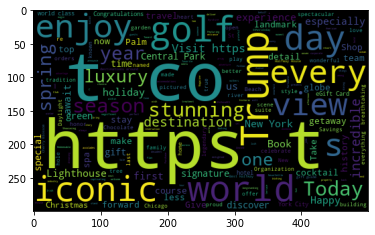

In [19]:
# wordcloud visualization
allwords = ' '.join([i for i in df['Tweets']])
Cloud = WordCloud(width=500,height=300,random_state=0,max_font_size=100).generate(allwords)
plt.imshow(Cloud)
plt.show()

In [20]:
# Create a function to compute negative neural and positve
def getAnalysis(score):
    if score<0:
        return 'Negative'
    elif score==0:
        return 'Neural'
    else:
        return 'Positive'
    
df['Analysis'] = df['Polarity'].apply(getAnalysis)
df

,Tweets,Subjectivity,Polarity,Analysis
0,We're toasting to WorldCocktailDay with a roun...,0.000000,0.000000,Neural
1,"Showcasing bold style, engaging design, and lu...",0.591667,0.308333,Positive
2,"Today we celebrate and honor all mothers, but ...",1.000000,0.666667,Positive
3,Follow in the footsteps of golf legends on the...,0.500000,0.250000,Positive
4,Savor the sweetness of chocolates all summer ...,0.400000,-0.062500,Negative
...,...,...,...,...
95,: We are thrilled to announce that the Lighth...,0.500000,0.800000,Positive
96,: Honoured to reveal that our Iconic lighthous...,0.400000,0.750000,Positive
97,"Rising 68 stories above 5th Avenue, has remai...",0.388636,0.284091,Positive
98,An enchanting spa treatment awaits you just be...,0.300000,0.100000,Positive


In [22]:
# how much positive neural and negative
df['Analysis'].value_counts()

Positive    88
Neural      10
Negative     2
Name: Analysis, dtype: int64

In [24]:
df.shape

(100, 4)

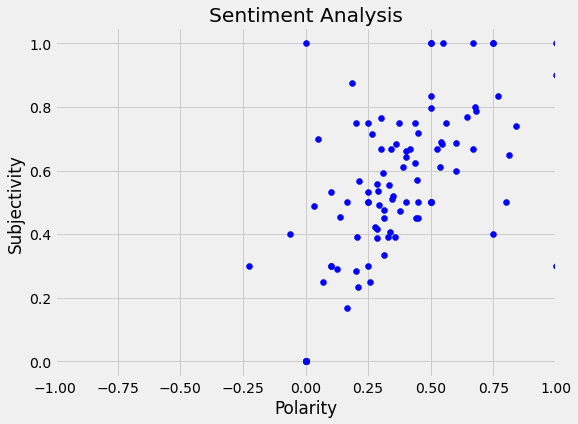

In [35]:
# plotting scatter plot
plt.figure(figsize=(8,6))
for i in range(0, df.shape[0]):
    plt.scatter(df["Polarity"][i], df["Subjectivity"][i], color='Blue')
    
plt.xlim(-1,1)
plt.title('Sentiment Analysis') 
plt.xlabel('Polarity') 
plt.ylabel('Subjectivity') 
plt.show()

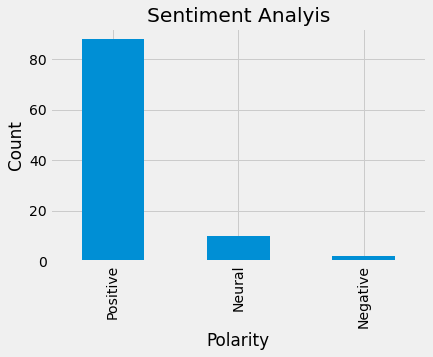

In [39]:
# bar graph
df['Analysis'].value_counts().plot(kind='bar')
plt.title("Sentiment Analyis")
plt.xlabel('Polarity')
plt.ylabel('Count')
plt.show()

In [41]:
# Lets get positive tweets only
i=1
sortedDF = df.sort_values(by=['Polarity'],ascending=False)
for j in range(0, sortedDF.shape[0]):
    if(sortedDF['Analysis'][j]=='Positive'):
         print(str(i)+ ') '+sortedDF['Tweets'][j])
    print()
    i=i+1


2) Showcasing bold style, engaging design, and luxury accommodations along the Chicago River. Plan your next getaway at the stunning : https://t.co/3dmRiYBrzS. https://t.co/TswHop7G8N

3) Today we celebrate and honor all mothers, but especially the wonderful mothers within our Trump Organization family. Happy MothersDay to you! https://t.co/nbE3Im6b0e

4) Follow in the footsteps of golf legends on the two iconic links courses of , now open for play. 

Book your tee time: https://t.co/RgclVtRFOo. https://t.co/NHqdKeEs1E


6) : Spotted: The ever innovative 's Burst Your Bubble cocktail in 's Netflix + Chill(ed): 12 C…

7) Is  on your bucket list? Take a virtual tour of our oceanfront public course and discover the challenging game and unrivaled scenic beauty that awaits: https://t.co/JNRMzmVc04. https://t.co/hEUhJWbKBX

8) Central Park is truly one of the wonders of the world. At our corporate headquarters in Trump Tower, we are delighted to enjoy this spectacular view every day, but es

In [42]:
# Lets get negative tweets only
i=1
sortedDF = df.sort_values(by=['Polarity'],ascending=False)
for j in range(0, sortedDF.shape[0]):
    if(sortedDF['Analysis'][j]=='Negative'):
         print(str(i)+ ') '+sortedDF['Tweets'][j])
    print()
    i=i+1





5) Savor the sweetness of  chocolates all summer long. Shipping of our decadent treats will pause May 1st and resume September 30th. Stock up today! https://t.co/J85ytVtmoR





















26) : Not content with just donning green hats, everything from buildings to rivers goes green for St Patrick's Day! 
St. Patri…













































































In [43]:
# Lets get positive tweets only
i=1
sortedDF = df.sort_values(by=['Polarity'],ascending=False)
for j in range(0, sortedDF.shape[0]):
    if(sortedDF['Analysis'][j]=='Neural'):
         print(str(i)+ ') '+sortedDF['Tweets'][j])
    print()
    i=i+1

1) We're toasting to WorldCocktailDay with a round-up of expertly crafted cocktails from our  and  destinations around the globe.🍹 https://t.co/spxufWusOE











12) Discover the ultimate golf resort experience at , where luxury is woven into every detail. 

📷:  https://t.co/3e6di4BjiB



15) We’re spending NationalBeerDay with a decadent burger followed by a lavish afternoon on the white sand beaches of . https://t.co/gfIoXMovRh

16) : Spring Toward Travel with ! Featuring a spring themed amenity and a generous credit towards dining, their off…








24) If we could be anywhere in the world this StPatricksDay, we'd be at , where Irish history and tradition is woven into every detail. https://t.co/0tBqEvShyK










34) : Weekends were made for our signature Martinis 🍸 What are you sipping on today? https://t.co/VnbQyrcAcX

35) : Friday plans? You'll find us lounging at the Royal Palm Pool. https://t.co/izwIYS2uSD


37) Our signature Trump clock stands out in every setting. htt